# Convolution and Comparison Between FIR and HRF

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.stats import gamma

## Convolution Example:

In this example, we will explore the mechanics of convolution and gain deeper understanding of its process.

Our approach to analyzing the data is structured as follows:

1. **Convolution of two signals:** We will simulate two signals and convolve them together.
2. **Step-by-Step Convolution Analysis:**  We will break down the convolution process, visualizing each intermediate step to better understand the underlying mechanics.

By seeing the example, we will not only gain a deeper understanding of how convolution operates in signal processing, but also interpret the results by comparing the intermediate steps. We will discuss how different parameters influence the final output. This example will illustrate the role of convolution in modeling time-series data, with applications to neuroscience, brain activity, and fMRI analysis.

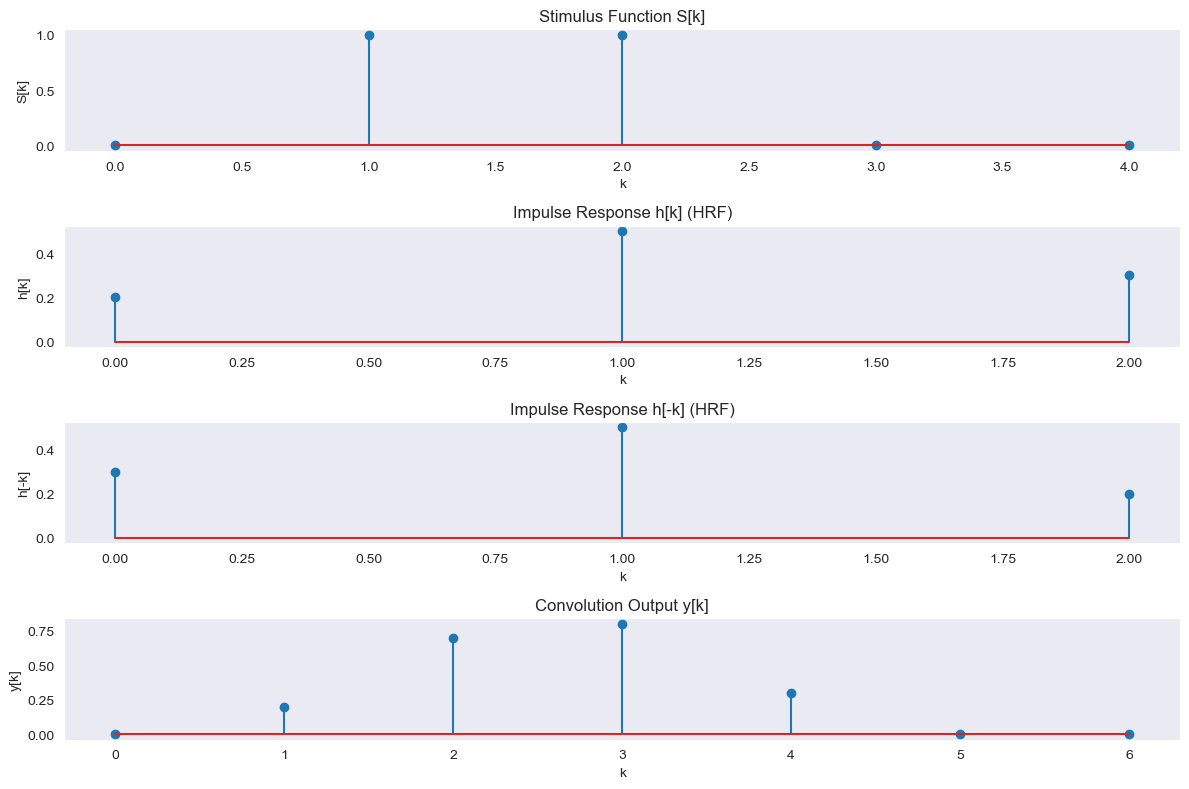

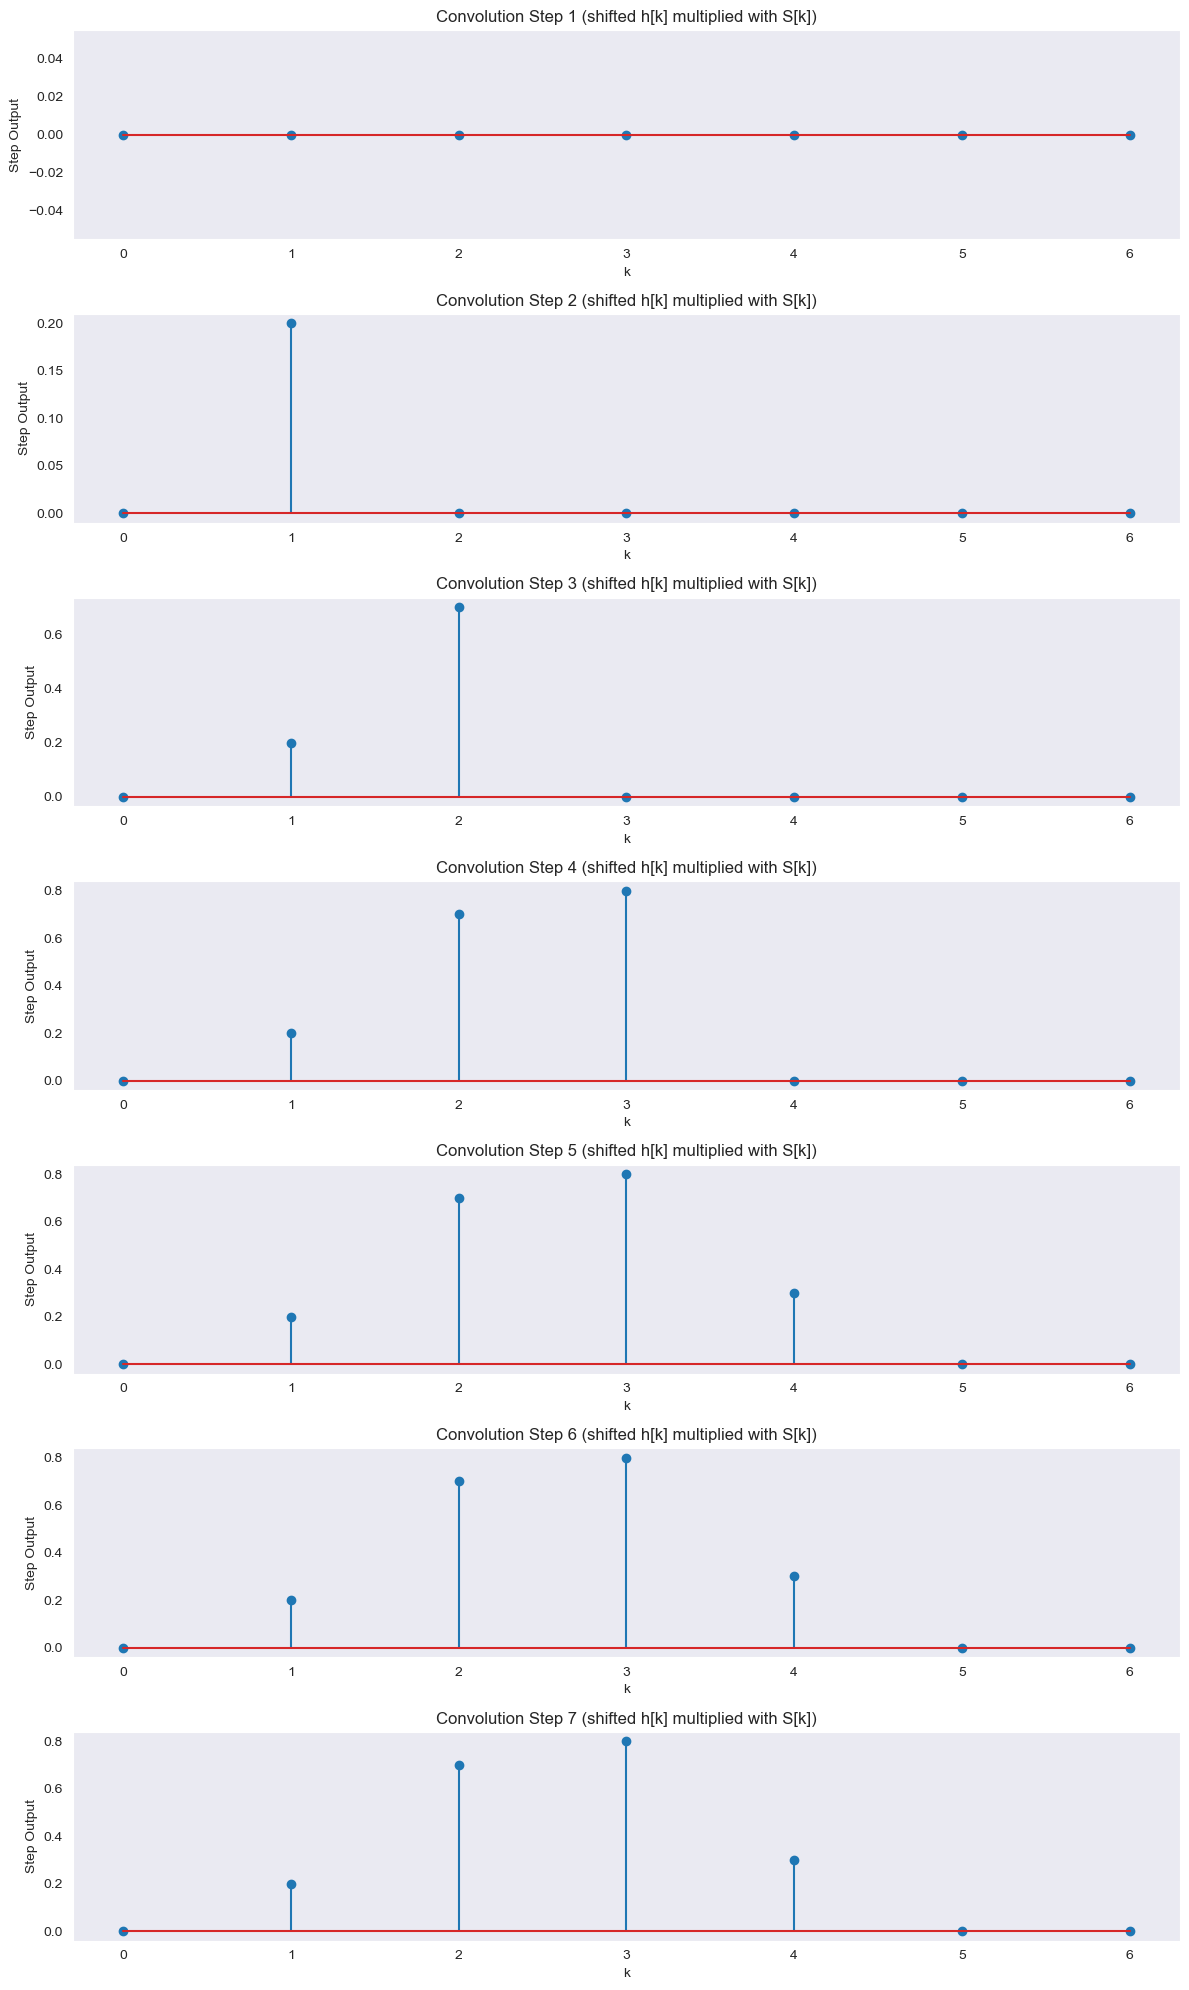

In [91]:
# Define the stimulus function S[k] and the HRF h[k]
S = np.array([0, 1, 1, 0, 0])  # Stimulus function
h = np.array([0.2, 0.5, 0.3])  # HRF

# Perform the convolution (use 'full' to get the complete convolution result)
y = np.convolve(S, h, mode='full')

# Plot S[k], h[k], y[k]
plt.figure(figsize=(12, 8))

# Plot S[k]
plt.subplot(4, 1, 1)
plt.stem(range(len(S)), S)
plt.title('Stimulus Function S[k]')
plt.xlabel('k')
plt.ylabel('S[k]')
plt.grid()

# Plot h[k]
plt.subplot(4, 1, 2)
plt.stem(range(len(h)), h)
plt.title('Impulse Response h[k] (HRF)')
plt.xlabel('k')
plt.ylabel('h[k]')
plt.grid()

# Plot h[-k]
plt.subplot(4, 1, 3)
plt.stem(range(len(h)), np.flip(h))
plt.title('Impulse Response h[-k] (HRF)')
plt.xlabel('k')
plt.ylabel('h[-k]')
plt.grid()

# Plot y[k] (convolved output)
plt.subplot(4, 1, 4)
plt.stem(range(len(y)), y)
plt.title('Convolution Output y[k]')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.grid()

plt.tight_layout()
plt.show()

h = np.pad(h, (0,(len(y)-len(h))), 'constant', constant_values=0)
S = np.pad(S, (0,(len(y)-len(S))), 'constant', constant_values=0)
conv_res = np.zeros(y.shape[0])


# Plot the intermediate steps of the convolution (the result of each step)
plt.figure(figsize=(12, 20))

# For each index in S, plot the convolution step
for j in range(len(y)):
    conv_step = 0
    for i in range(len(h)):
        conv_step += S[i] * h[j-i]
    conv_res[j] = conv_step

    # Plot the convolution step at each index i
    plt.subplot(len(y), 1, j+1)
    plt.stem(range(len(y)), conv_res)
    plt.title(f'Convolution Step {j+1} (shifted h[k] multiplied with S[k])')
    plt.xlabel('k')
    plt.ylabel('Step Output')
    plt.grid()

plt.tight_layout()
plt.show()

# Exercise 1:

In this exercise, we will investigate how different models can be used to model the BOLD response in fMRI data, focusing on two approaches: convolution using the Hemodynamic Response Function (HRF) and the use of a Finite Impulse Response (FIR) model. The goal is to compare the HRF-based model with the FIR model and understand how well each can capture the BOLD response, especially under different correlation conditions.

Our approach to analyzing the data is structured as follows:

1. **HRF Convolution Model:** We will model the BOLD response by convolving the periodic stimuli with the HRF, which represents the typical brain response to neural activity over time. The HRF is assumed to have a specific shape, which is convolved with the stimulus to simulate the resulting fMRI signal.

2. **FIR Model:** We will use a FIR model to approximate the BOLD response, where the stimulus is convolved with a series of filter weights. In one case, these weights will be randomly generated to create a scenario with no correlation between the HRF and FIR model outputs, and in another case, the weights will be chosen based on the HRF to create a scenario with high correlation.


By completing this exercise, we will interpret the results of both models, focusing on whether the FIR model with random weights fails to capture the true BOLD response compared to the HRF convolution model. We will also discuss the implications of the correlation between the two models, specifically how the FIR model with HRF-related weights can provide a better approximation to the actual BOLD response compared to a randomly generated FIR model. This will give us insights into the strengths and limitations of using FIR models for fMRI analysis in neuroscience.

### No correlation between HRF and FIR model predictions

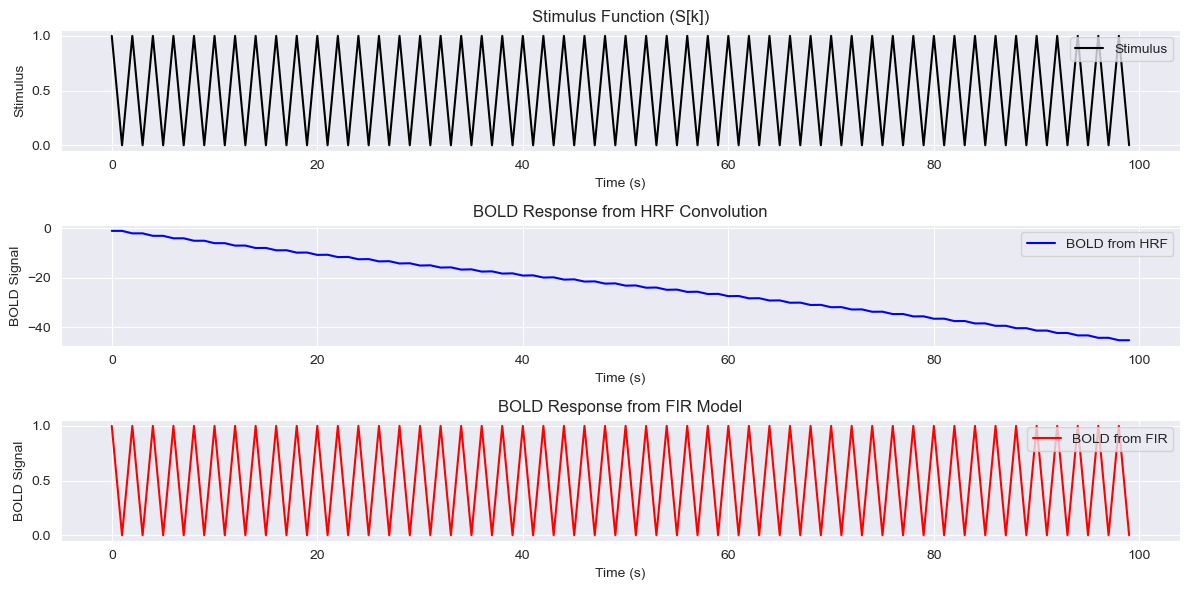

Correlation between HRF and FIR model predictions: -0.00


In [93]:
# Generate synthetic stimulus: periodic square wave
duration = 100  # seconds
sampling_rate = 1  # 1 Hz sampling rate
time = np.arange(0, duration, sampling_rate)
stimulus = np.zeros_like(time)
stimulus[::2] = 1  # alternating 1s and 0s (stimulus every 2 seconds)

# HRF Model (Gamma function)
def hrf(t, peak=5, offset=1, sigma=1):
    return gamma.pdf(t, peak / sigma, scale=sigma) - offset  # Gamma function with peak at ~5s

# Generate HRF (Hemodynamic Response Function)
hrf_time = np.arange(0, 30, 0.1)  # Time vector for HRF, range from 0 to 30 seconds
hrf_signal = hrf(hrf_time)

# Convolve stimulus with HRF to get the predicted BOLD signal
bold_hrf = convolve(stimulus, hrf_signal, mode='full')[:len(stimulus)]

# FIR Model (Finite Impulse Response)
# Define FIR basis functions: use simple delta functions
fir_duration = 10  # seconds, duration of FIR model
fir_basis = np.zeros(fir_duration)
fir_basis[0] = 1  # Impulse at the first 1 second

# Convolve stimulus with FIR basis functions (simple convolution)
bold_fir = convolve(stimulus, fir_basis, mode='full')[:len(stimulus)]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Stimulus
plt.subplot(3, 1, 1)
plt.plot(time, stimulus, label='Stimulus', color='black')
plt.title('Stimulus Function (S[k])')
plt.xlabel('Time (s)')
plt.ylabel('Stimulus')
plt.legend()

# Plot HRF Convolved BOLD Signal
plt.subplot(3, 1, 2)
plt.plot(time, bold_hrf, label='BOLD from HRF', color='blue')
plt.title('BOLD Response from HRF Convolution')
plt.xlabel('Time (s)')
plt.ylabel('BOLD Signal')
plt.legend()

# Plot FIR Convolved BOLD Signal
plt.subplot(3, 1, 3)
plt.plot(time, bold_fir, label='BOLD from FIR', color='red')
plt.title('BOLD Response from FIR Model')
plt.xlabel('Time (s)')
plt.ylabel('BOLD Signal')
plt.legend()

# Show all plots
plt.tight_layout()
plt.show()

# Calculate the correlation between HRF and FIR models
correlation = np.corrcoef(bold_hrf, bold_fir)[0, 1]
print(f'Correlation between HRF and FIR model predictions: {correlation:.2f}')


### Correlation between HRF and FIR model predictions

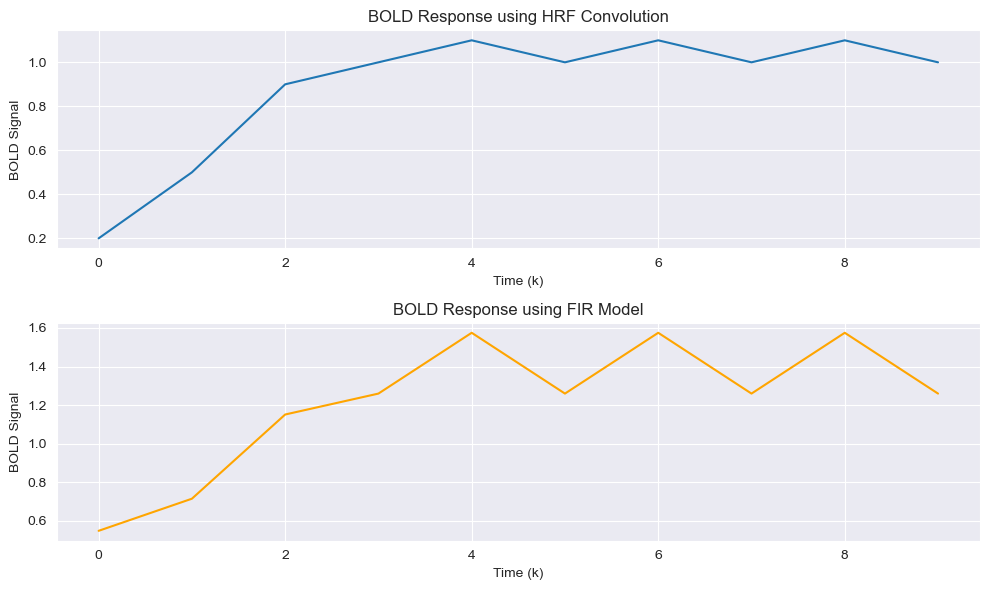

Correlation between HRF and FIR model (random weights): 0.9570274510007998


In [95]:
# Define the stimulus S[k]
S = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# Define the HRF function (simplified)
HRF = [0.2, 0.5, 0.7, 0.5, 0.2]

# Convolution (HRF model)
def convolve_stimulus(S, HRF):
    y = np.zeros(len(S) + len(HRF) - 1)
    for k in range(len(y)):
        for i in range(len(HRF)):
            if k-i >= 0 and k-i < len(S):
                y[k] += S[k-i] * HRF[i]
    return y

y_hrf = convolve_stimulus(S, HRF)

# FIR Model with random weights for no correlation
np.random.seed(0)
random_fir_weights = np.random.rand(5)  # Random FIR filter weights

def fir_model(S, fir_weights):
    y_fir = np.convolve(S, fir_weights, mode='full')
    return y_fir[:len(S)]  # Ensure the output is the same length as the stimulus

y_fir_random = fir_model(S, random_fir_weights)

# Crop the HRF result to match the length of the stimulus
y_hrf_cropped = y_hrf[:len(S)]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot HRF convolution output
plt.subplot(2, 1, 1)
plt.plot(y_hrf_cropped, label='HRF Convolution')
plt.title('BOLD Response using HRF Convolution')
plt.xlabel('Time (k)')
plt.ylabel('BOLD Signal')

# Plot FIR model output (random weights)
plt.subplot(2, 1, 2)
plt.plot(y_fir_random, label='FIR Model (Random Weights)', color='orange')
plt.title('BOLD Response using FIR Model')
plt.xlabel('Time (k)')
plt.ylabel('BOLD Signal')

plt.tight_layout()
plt.show()

# Compute correlation
correlation_random = np.corrcoef(y_hrf_cropped, y_fir_random)[0, 1]
print("Correlation between HRF and FIR model (random weights):", correlation_random)
